# 1/ Import thư viện và kiểm tra Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install mlxtend

In [ ]:
#BTC data
link = 'https://drive.google.com/file/d/1y2KcT_oJPcXQHS_x7BiDK5-BRW6xz9GV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df_BTC = df.copy()

In [ ]:
#BNB data
link = 'https://drive.google.com/file/d/1Q58HV6tjWeySXObeId2HdpCn_HhzdRwy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df1 = pd.read_csv(path)

In [ ]:
#Gold data
link = 'https://drive.google.com/file/d/1BxloM25YjWg1vWtps17C5YYxviRHFe0h/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df3 = pd.read_csv(path)

In [ ]:
df.head() #BTC head

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [ ]:
df1.head() #BNB head

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
1,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
3,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800
4,2017-11-14,1.68928,1.73537,1.56827,1.59258,1.59258,7829600


In [ ]:
df.info() #BTC data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2441 non-null   object 
 1   Open                          2441 non-null   float64
 2   High                          2441 non-null   float64
 3   Low                           2441 non-null   float64
 4   Close                         2441 non-null   float64
 5   Volume                        2441 non-null   float64
 6   Close time                    2441 non-null   object 
 7   Quote asset volume            2441 non-null   float64
 8   Number of trades              2441 non-null   int64  
 9   Taker buy base asset volume   2441 non-null   float64
 10  Taker buy quote asset volume  2441 non-null   float64
 11  Ignore                        2441 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 229.0+ KB


In [ ]:
# Tìm chỉ số của giá trị min trong cột Low
min_low_idx = df['Low'].idxmin()

# Tìm chỉ số của giá trị max trong cột High
max_high_idx = df['High'].idxmax()

# Lấy ngày và giá trị tương ứng từ các cột
min_low_value = df.loc[min_low_idx, 'Low']
min_low_date = df.loc[min_low_idx, 'Open time']

max_high_value = df.loc[max_high_idx, 'High']
max_high_date = df.loc[max_high_idx, 'Open time']

# In kết quả
print(f"Ngày có giá trị Low thấp nhất là: {min_low_date} với giá trị là {min_low_value}")
print(f"Ngày có giá trị High cao nhất là: {max_high_date} với giá trị là {max_high_value}")


Ngày có giá trị Low thấp nhất là: 2018-12-15 với giá trị là 3156.26
Ngày có giá trị High cao nhất là: 2024-03-14 với giá trị là 73777.0


In [ ]:
#Define function summary to get all info of BTC
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values

    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='YlGnBu')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Open time,object,0,0.000000,2441,2441,nan,nan,nan
Open,float64,0,0.000000,2440,2441,3211.710000,73072.400000,25638.038853
High,float64,0,0.000000,2382,2441,3276.500000,73777.000000,26260.692028
Low,float64,0,0.000000,2383,2441,3156.260000,71333.310000,24956.096841
Close,float64,0,0.000000,2440,2441,3211.720000,73072.410000,25654.639590
Volume,float64,0,0.000000,2441,2441,1521.537318,760705.362783,73408.989955
Close time,object,0,0.000000,2441,2441,nan,nan,nan
Quote asset volume,float64,0,0.000000,2441,2441,11770168.043866,17465307097.884071,1772412409.582372
Number of trades,int64,0,0.000000,2439,2441,12417.000000,15223589.000000,1553324.748464
Taker buy base asset volume,float64,0,0.000000,2441,2441,844.258813,374775.574085,36497.579067


In [ ]:
# Drop 'Ignore' and  'Close time' column

df = df.drop(['Ignore', 'Close time'], axis=1)
print("Columns 'Ignore' and 'Close time' dropped successfully.")

Columns 'Ignore' and 'Close time' dropped successfully.


In [ ]:
#check null & duplicate
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0
Taker buy quote asset volume,0
MA50,49


In [ ]:
df1.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df1.duplicated().sum()

0

In [ ]:
#check if the column ['Open time'] is a continuous, unbroken series of days

# Convert 'Open time' to datetime objects
df['Open time'] = pd.to_datetime(df['Open time'])

# Sort the DataFrame by 'Open time'
df = df.sort_values('Open time')

# Check if the 'Open time' column is a continuous series of days
expected_dates = pd.date_range(start=df['Open time'].min(), end=df['Open time'].max(), freq='D')
actual_dates = df['Open time'].unique()

if set(expected_dates) == set(actual_dates):
  print("The 'Open time' column is a continuous series of days from 2018 to 2024.")
else:
  print("The 'Open time' column is not a continuous series of days.")
  missing_dates = set(expected_dates) - set(actual_dates)
  print("Missing dates:", missing_dates)


The 'Open time' column is a continuous series of days from 2018 to 2024.


In [ ]:
#Mean of BTC main features
mean_close_price = df['Close'].mean()
mean_open_price = df['Open'].mean()
mean_high_price = df['High'].mean()
mean_low_price = df['Low'].mean()

mean_prices = pd.DataFrame({
    'Price Type': ['Close', 'Open', 'High', 'Low'],
    'Mean Price': [mean_close_price, mean_open_price, mean_high_price, mean_low_price]
})

mean_prices.style.background_gradient(cmap='Oranges')

,Price Type,Mean Price
0,Close,25654.639590
1,Open,25638.038853
2,High,26260.692028
3,Low,24956.096841


# 2/ EDA

In [ ]:
df['Open time'] = pd.to_datetime(df['Open time'])

In [ ]:
# Check the data type of the 'Open time' column
print(df['Open time'].dtype)

datetime64[ns]


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

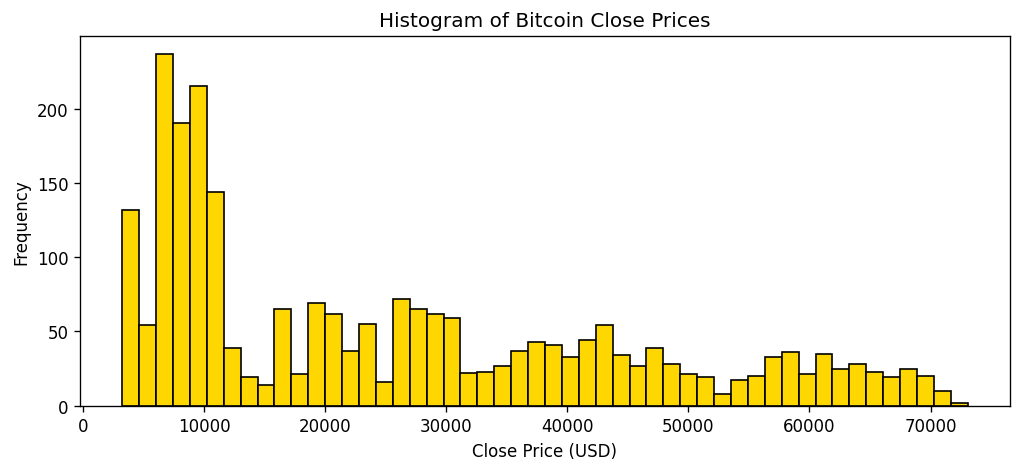

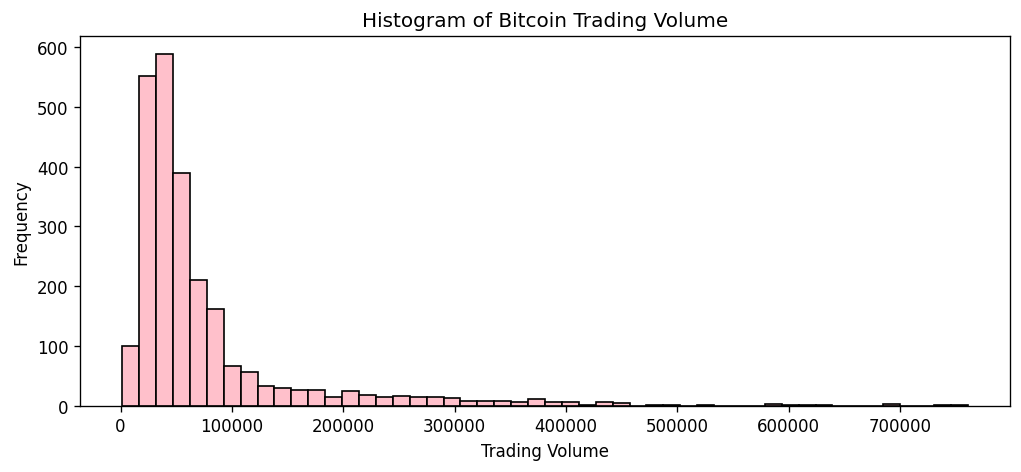

In [ ]:
# Histogram for Close Price
plt.figure(figsize=(10, 4))
plt.hist(df['Close'], bins=50, color='gold', edgecolor='black')
plt.title('Histogram of Bitcoin Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Trading Volume
plt.figure(figsize=(10, 4))
plt.hist(df['Volume'], bins=50, color='pink', edgecolor='black')
plt.title('Histogram of Bitcoin Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()


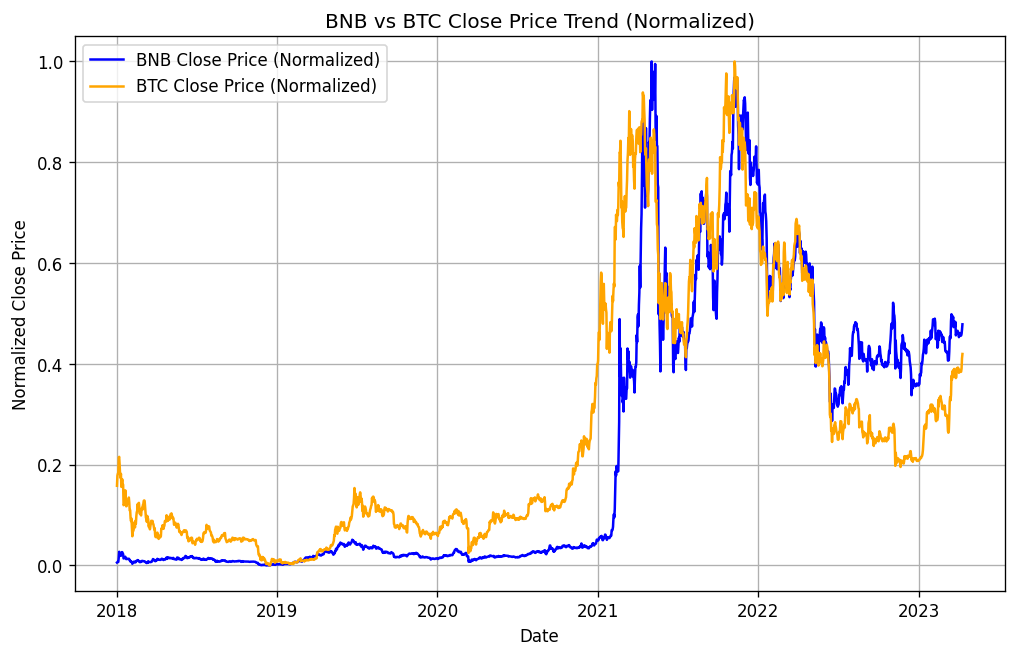

In [ ]:
#Mindset 1: Normalize to compare BTC and BNB
# Parse the date columns as datetime objects if not already
df1['Date'] = pd.to_datetime(df1['Date'])  # BNB
df['Open time'] = pd.to_datetime(df['Open time'])  # BTC

# Merge the two dataframes based on date into df2
df2 = pd.merge(df1[['Date', 'Close']], df[['Open time', 'Close']],
               left_on='Date', right_on='Open time', suffixes=('_BNB', '_BTC'))

# Normalize the Close prices using Min-Max scaling (between 0 and 1)
df2['Close_BNB_normalized'] = (df2['Close_BNB'] - df2['Close_BNB'].min()) / (df2['Close_BNB'].max() - df2['Close_BNB'].min())
df2['Close_BTC_normalized'] = (df2['Close_BTC'] - df2['Close_BTC'].min()) / (df2['Close_BTC'].max() - df2['Close_BTC'].min())

# Plot the normalized close prices of BNB and BTC
plt.figure(figsize=(10, 6))

plt.plot(df2['Date'], df2['Close_BNB_normalized'], label='BNB Close Price (Normalized)', color='blue')
plt.plot(df2['Date'], df2['Close_BTC_normalized'], label='BTC Close Price (Normalized)', color='orange')

# Customize the plot
plt.title('BNB vs BTC Close Price Trend (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid(True)
plt.show()

# --> can not show actual price, move to Mindset 2

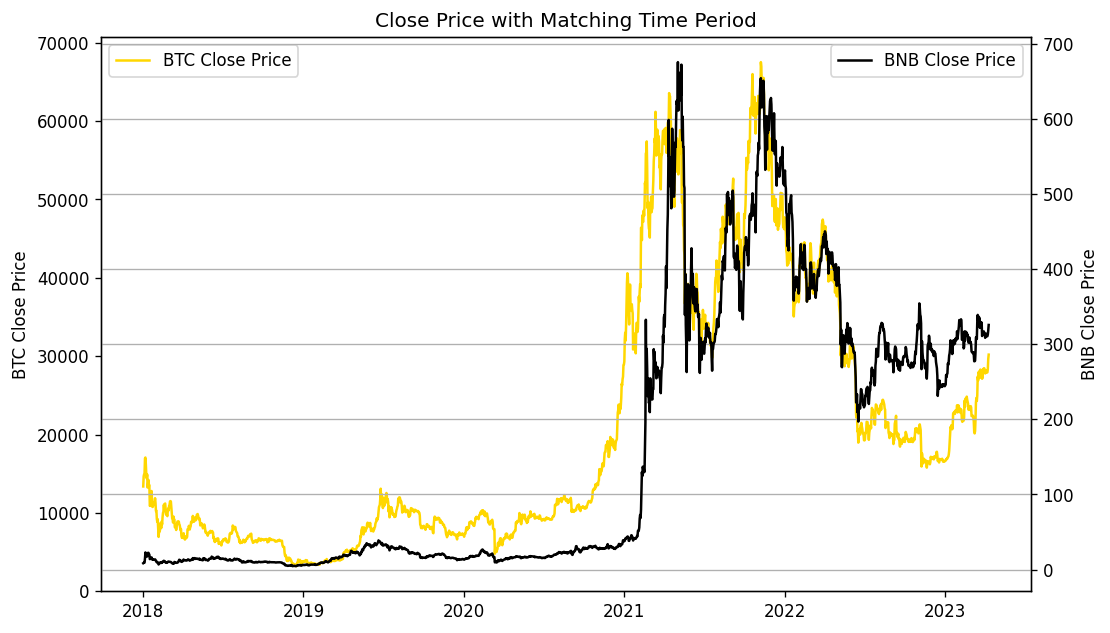

In [ ]:
# Minset 2: use axs to show price of both BNB and BTC

# Merge hai DataFrame dựa trên khoảng thời gian chung
merged_data = pd.merge(df[['Open time', 'Close']], df1[['Date', 'Close']],
                       left_on='Open time', right_on='Date', suffixes=('_BTC', '_BNB'))

# Tạo biểu đồ sau khi lọc dữ liệu
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Vẽ Close Price cho BTC
axs.plot(merged_data['Open time'], merged_data['Close_BTC'], label='BTC Close Price', color='gold')

# Tạo trục y thứ 2 để vẽ BNB
ax2 = axs.twinx()
ax2.plot(merged_data['Open time'], merged_data['Close_BNB'], label='BNB Close Price', color='black')

# Đặt tiêu đề và nhãn
axs.set_title('Close Price with Matching Time Period')
axs.set_ylabel('BTC Close Price')
ax2.set_ylabel('BNB Close Price')

# Hiển thị chú thích cho các đường đồ thị
axs.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

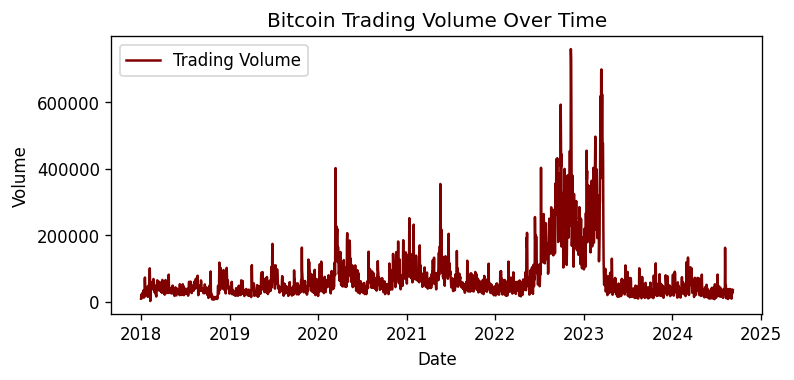

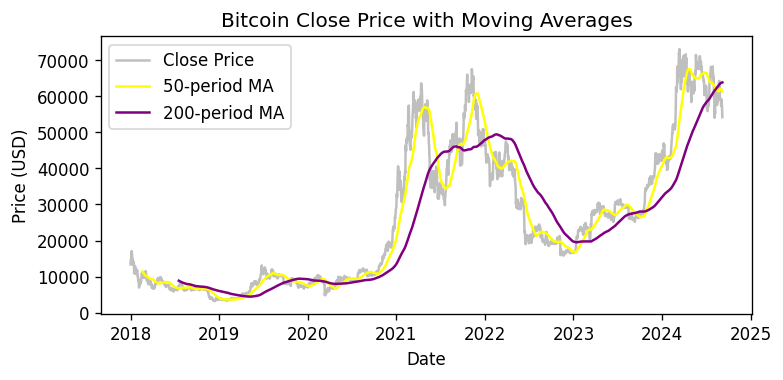

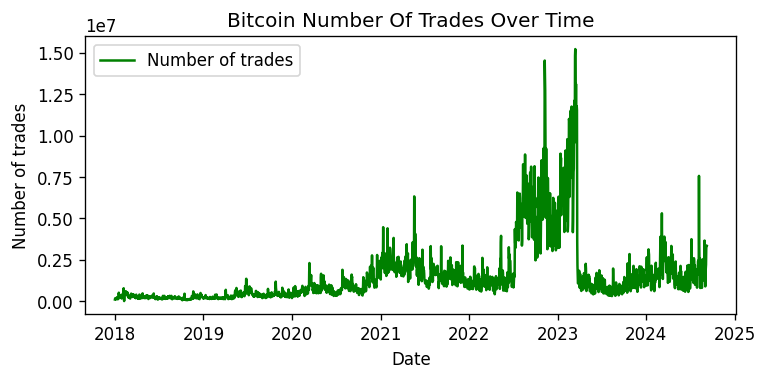

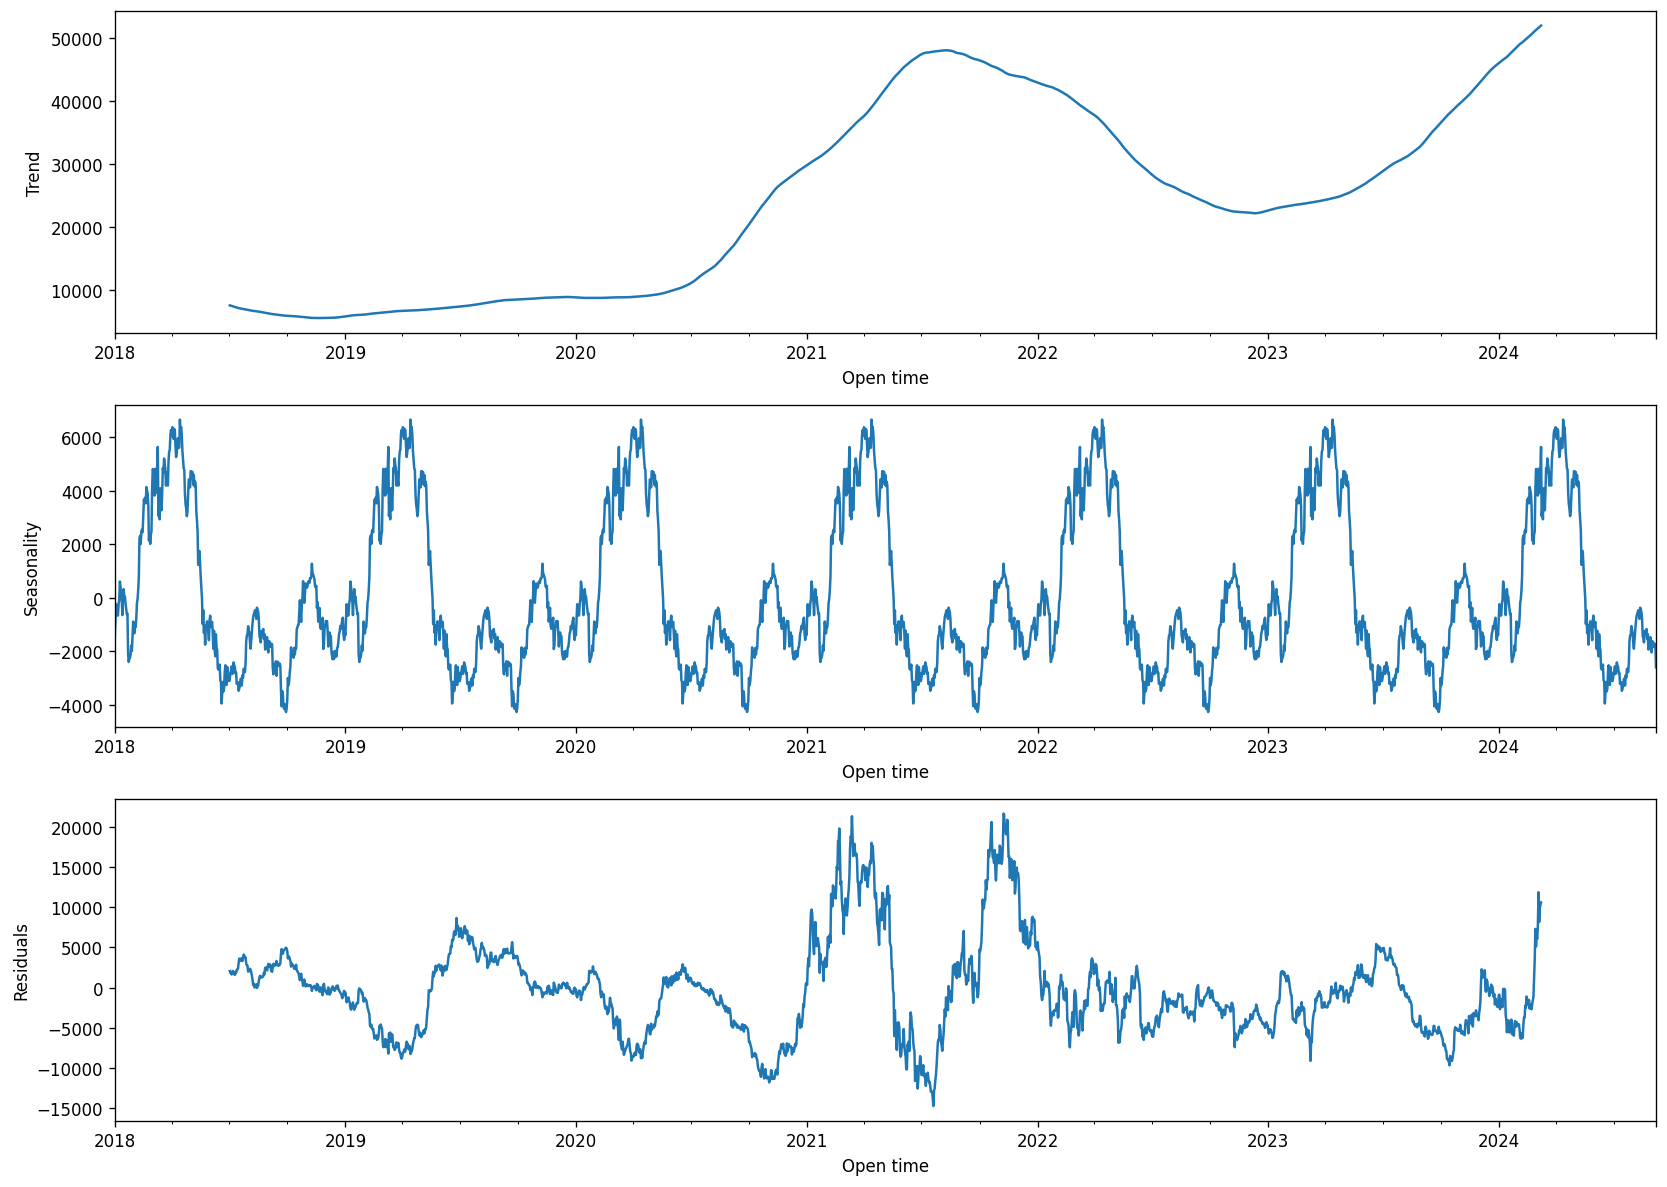

In [ ]:
df.set_index('Open time', inplace=True)

# Ensure all numeric columns are of type float
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].astype(float)

# # 1. Visualizing Close Prices Over Time

# plt.figure(figsize=(7, 3))
# plt.plot(df.index, df['Close'], label='Close Price', color='violet')
# plt.title('Bitcoin Close Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price (USD)')
# plt.legend()
# plt.show()

# # 2. Candlestick Chart (Using mplfinance)

# # Resample data to daily intervals for clarity
# df_daily = df.resample('D').agg({
#     'Open': 'first',
#     'High': 'max',
#     'Low': 'min',
#     'Close': 'last',
#     'Volume': 'sum'
# })

# 3. Analyzing Trading Volume

plt.figure(figsize=(7, 3))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='maroon')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# 4. Moving Averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(7, 3))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5, color='grey')
plt.plot(df.index, df['MA50'], label='50-period MA', color='yellow')
plt.plot(df.index, df['MA200'], label='200-period MA', color='purple')
plt.title('Bitcoin Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# 5. Analyzing Number of trades

plt.figure(figsize=(7, 3))
plt.plot(df.index, df['Number of trades'], label='Number of trades', color='green')
plt.title('Bitcoin Number Of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Number of trades')
plt.legend()
plt.show()

# 6. Seasonality and Trend Analysis

# Since the dataset is large, we can sample it to a daily frequency
df_decompose = df['Close'].resample('D').mean()

# Decompose the time series
decomposition = seasonal_decompose(df_decompose.dropna(), model='additive', period=365)

# Plot the decomposition
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(14,10))
decomposition.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

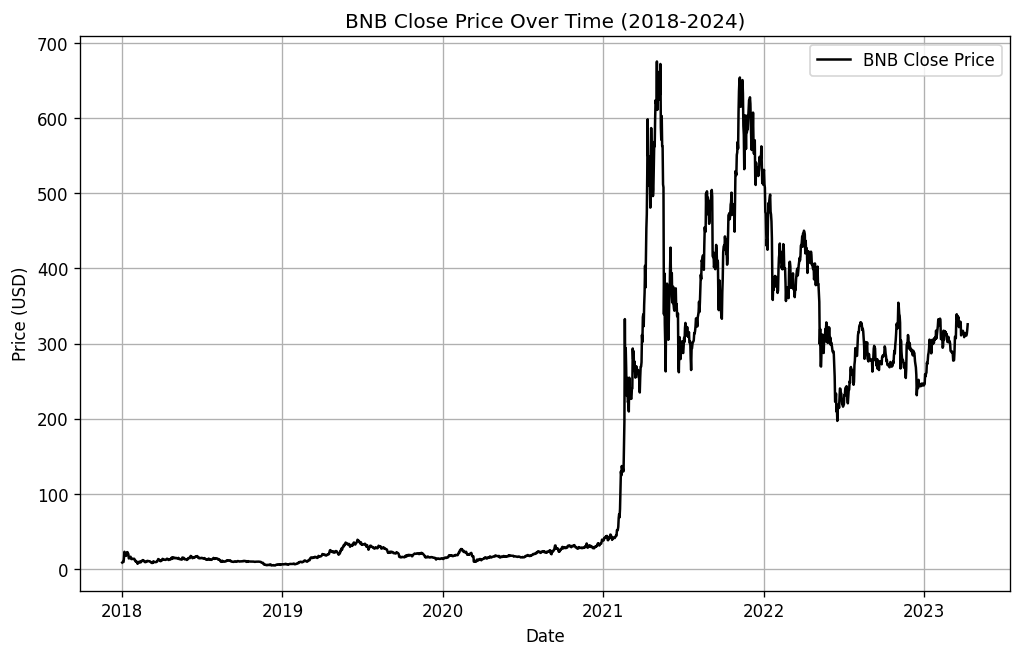

In [ ]:
# Filter the DataFrame for the desired date range
df1_filtered = df1[(df1['Date'] >= '2018-01-01') & (df1['Date'] <= '2024-12-31')]

# Plot the Close price over time
plt.figure(figsize=(10, 6))
plt.plot(df1_filtered['Date'], df1_filtered['Close'], label='BNB Close Price', color='black')
plt.title('BNB Close Price Over Time (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


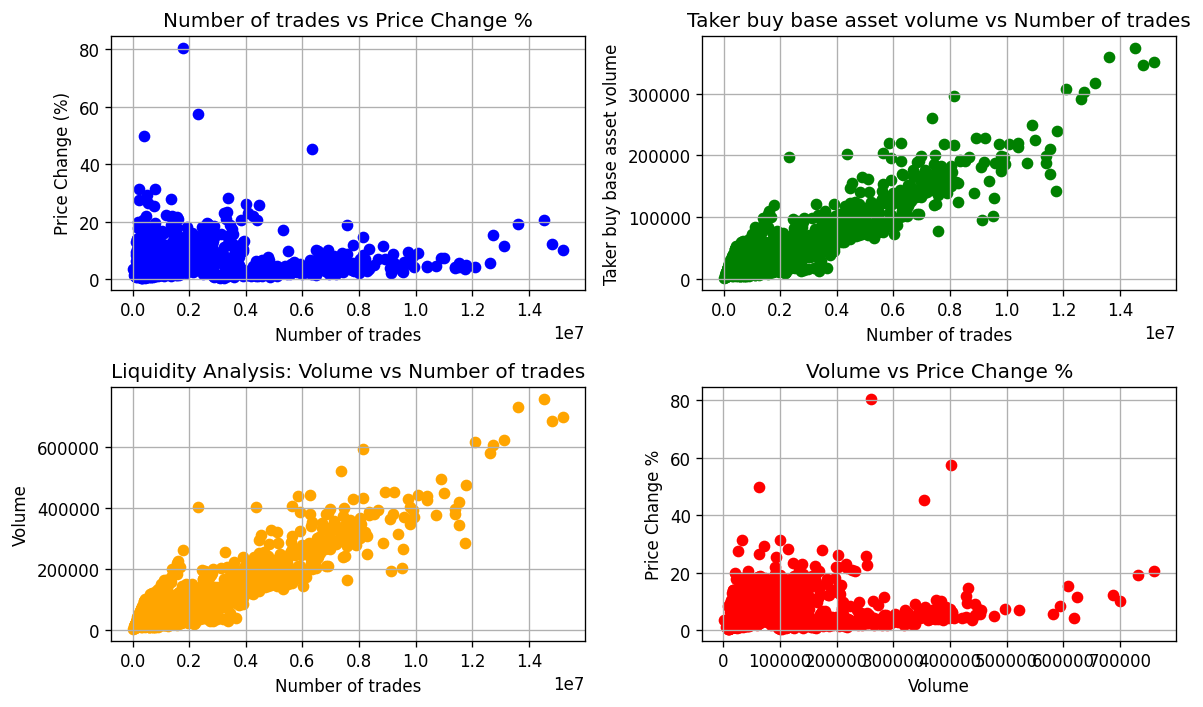

In [ ]:
df['Price Change %'] = ((df['High'] - df['Low']) / df['Low']) * 100

# 1. Number of trades vs Price Change
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.scatter(df['Number of trades'], df['Price Change %'], color='blue', label='Price Change %')
plt.xlabel('Number of trades')
plt.ylabel('Price Change (%)')
plt.title('Number of trades vs Price Change %')
plt.grid(True)

# 2. Taker buy base asset volume vs Number of trades
plt.subplot(2, 2, 2)
plt.scatter(df['Number of trades'], df['Taker buy base asset volume'], color='green', label='Taker buy base asset volume')
plt.xlabel('Number of trades')
plt.ylabel('Taker buy base asset volume')
plt.title('Taker buy base asset volume vs Number of trades')
plt.grid(True)

# 3. Volume vs Number of trades (Liquidity)
plt.subplot(2, 2, 3)
plt.scatter(df['Number of trades'], df['Volume'], color='orange', label='Volume')
plt.xlabel('Number of trades')
plt.ylabel('Volume')
plt.title('Liquidity Analysis: Volume vs Number of trades')
plt.grid(True)

# 4. Volume vs Price Change %
plt.subplot(2, 2, 4)
plt.scatter(df['Volume'], df['Price Change %'], color='red')
plt.xlabel('Volume')
plt.ylabel('Price Change %')
plt.title('Volume vs Price Change %')
plt.grid(True)

plt.tight_layout()
plt.show()


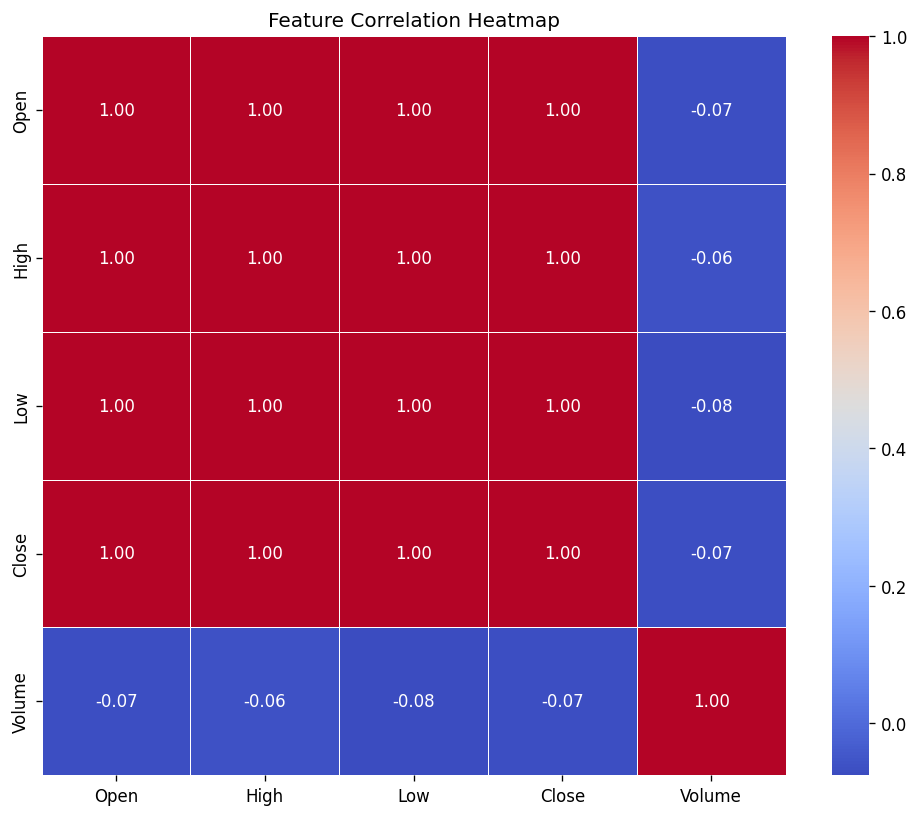

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

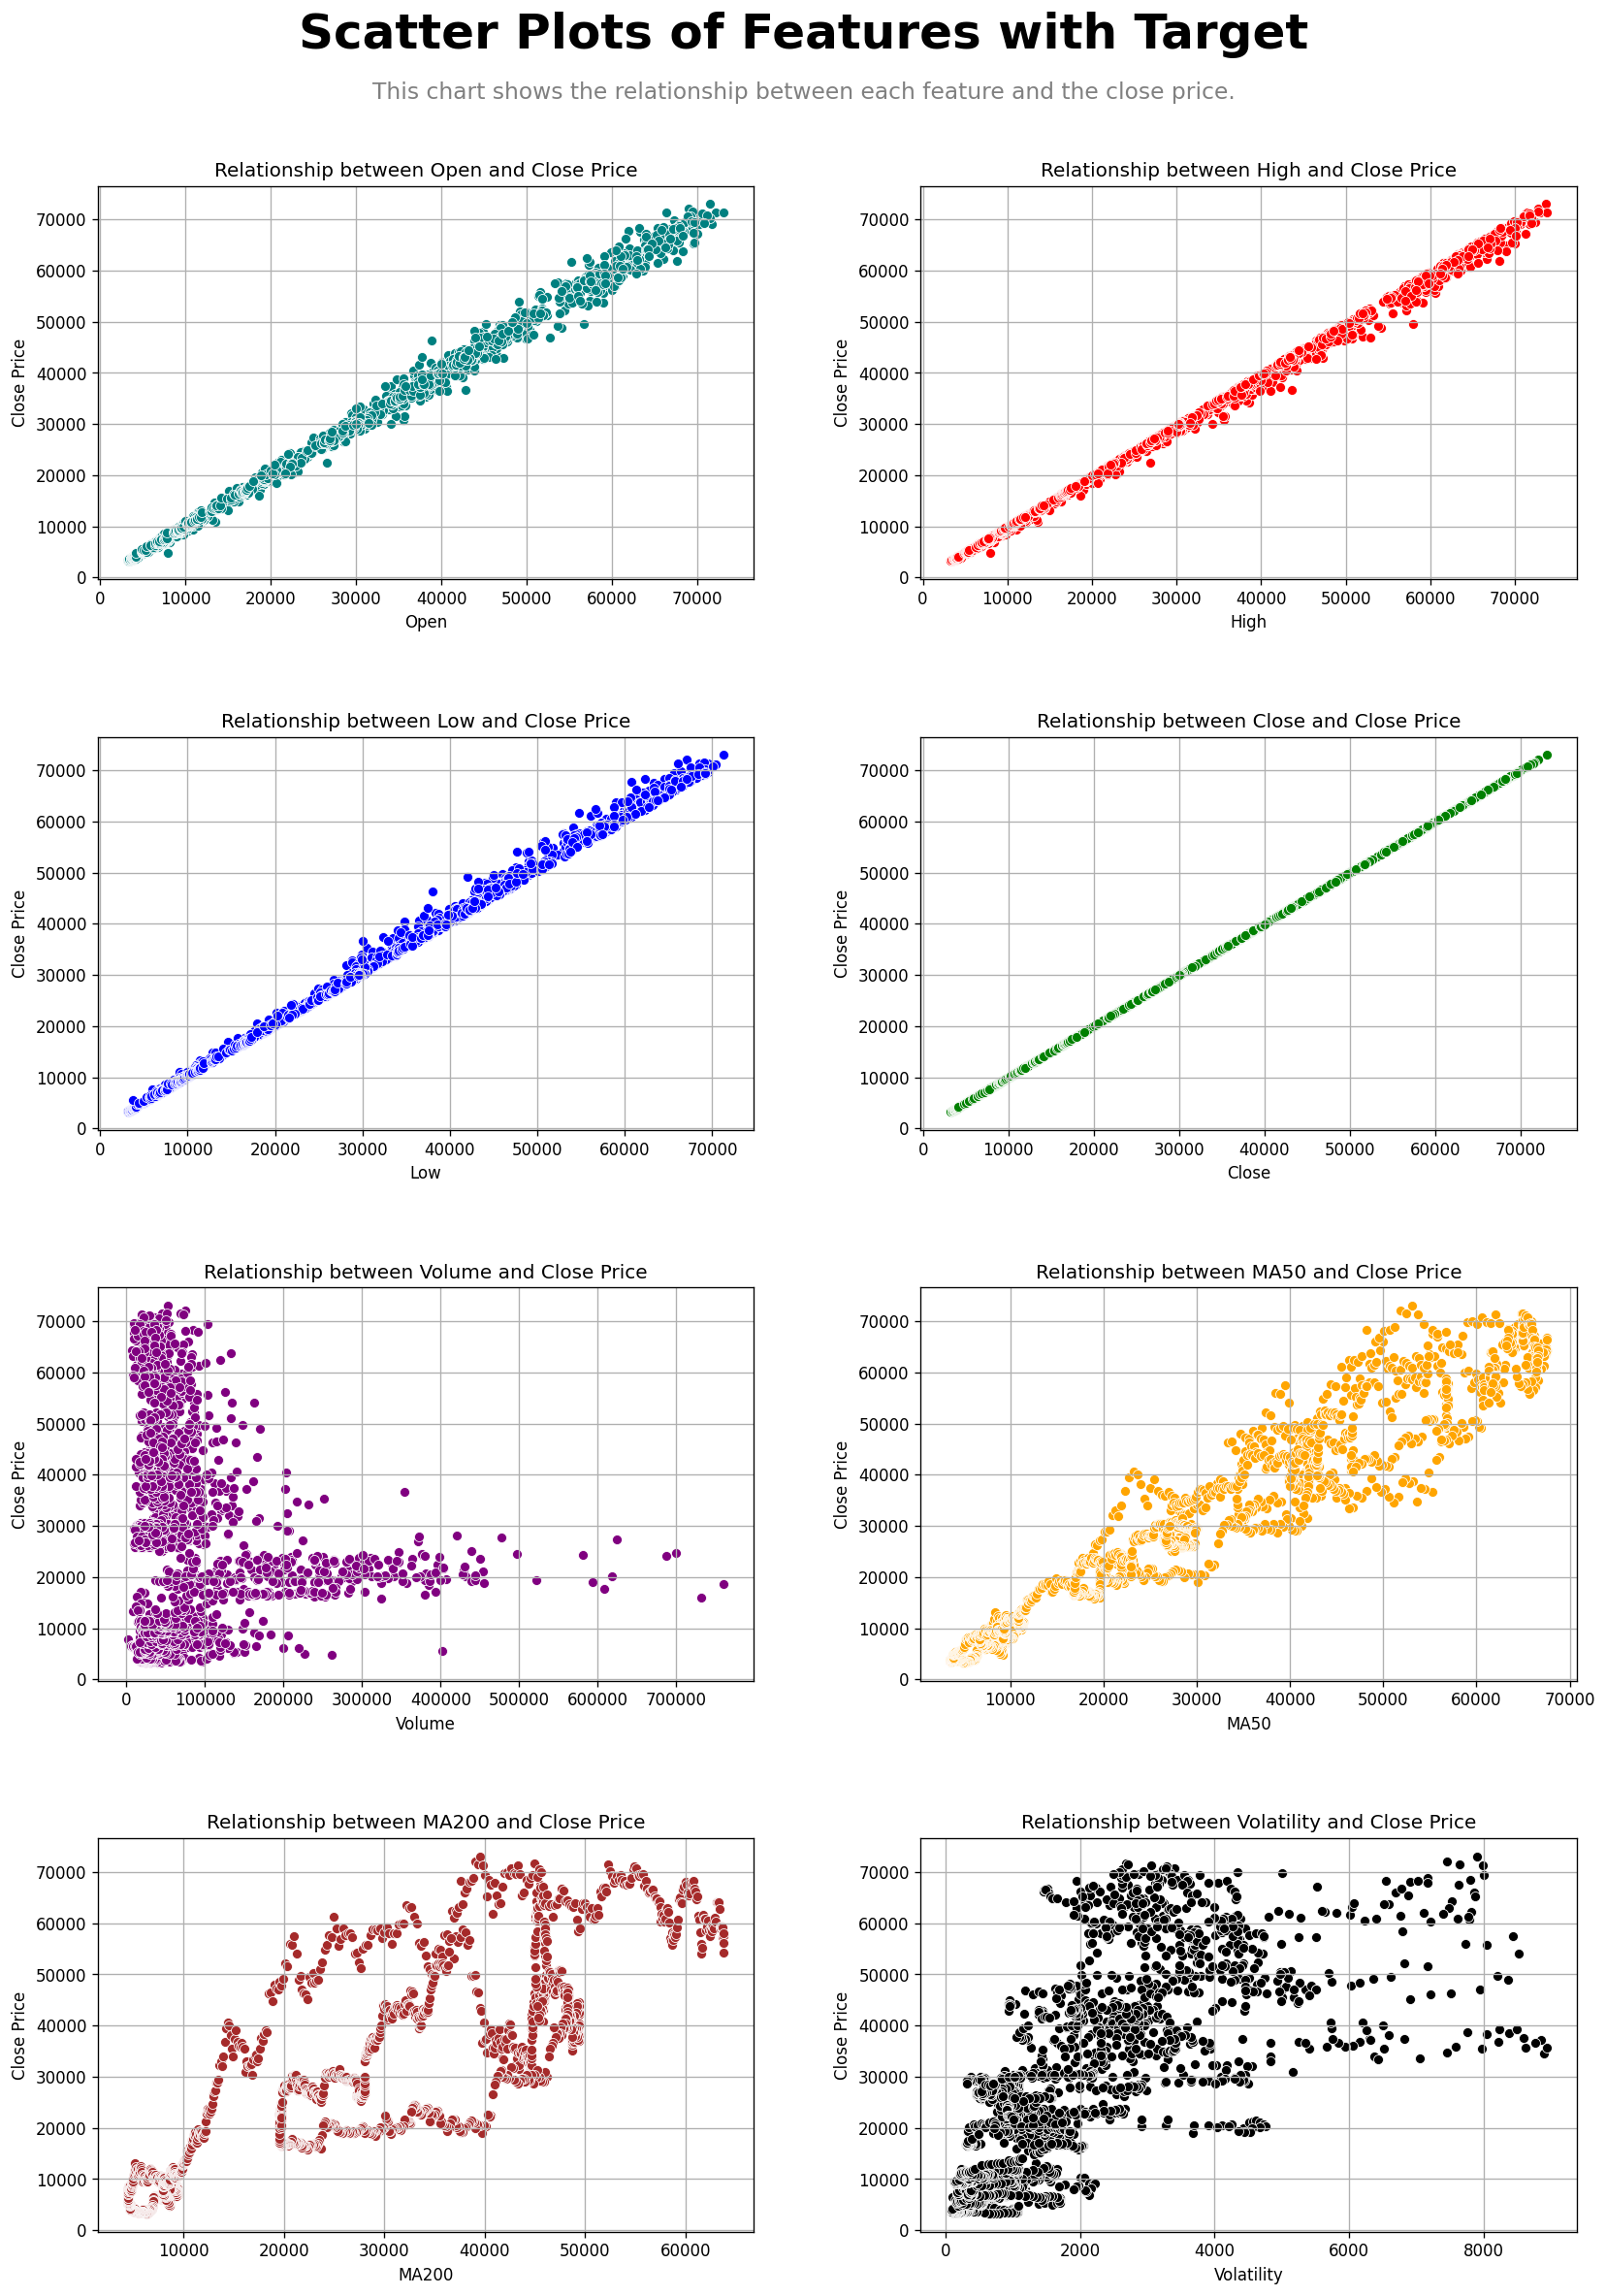

In [ ]:
feature = df.columns[df.columns != 'Close']
colors = ['teal', 'red', 'blue', 'green', 'purple', 'orange', 'brown', 'black', '#E52B50']

plt.figure(figsize=(15, 25))
plt.suptitle('Scatter Plots of Features with Target', fontsize=30, fontweight='bold', y=0.98)
plt.figtext(0.5, 0.95, 'This chart shows the relationship between each feature and the close price.', ha='center', fontsize=14, color='gray')
for i, feature in enumerate(features, start=1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=df[feature], y=df['Close'], color=colors[i-1])
    plt.title(f'Relationship between {feature} and Close Price')
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.grid(True)

plt.tight_layout(pad=5)
plt.show()

In [ ]:
df3.head()

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2,2,2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
3,3,2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
4,4,2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8


In [ ]:
# Step 1: Convert the 'Date' column to datetime format
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m-%d')

# Step 2: Filter data between 2018 and 2024
df3_filtered = df3[(df3['Date'] >= '2018-01-01') & (df3['Date'] <= '2024-07-03')]

# Step 3: Sort the data by 'Date' in ascending order
df3_sorted = df3_filtered.sort_values(by='Date', ascending=True)

# Optionally, reset the index if needed
df3_sorted.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
df3_sorted.head()

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,1636,2018-01-02,1316.1,269072.0,1305.3,1320.4,1304.6
1,1635,2018-01-03,1318.5,342866.0,1319.0,1323.0,1308.9
2,1634,2018-01-04,1321.6,350803.0,1315.5,1327.3,1307.1
3,1633,2018-01-05,1322.3,322422.0,1324.4,1324.7,1314.6
4,1632,2018-01-08,1320.4,238332.0,1321.8,1323.0,1315.7


In [ ]:
df_BTC['Open time'] = pd.to_datetime(df_BTC['Open time'], unit='ns')

In [ ]:
# Merge the DataFrames based on the 'Open time' and 'Date' columns
merged_df = pd.merge(df_BTC, df3_sorted, left_on='Open time', right_on='Date', how='inner')

# Display the merged DataFrame
print(merged_df[['Open time', 'Close', 'Close/Last']].head())

   Open time     Close  Close/Last
0 2018-01-02  14675.11      1316.1
1 2018-01-03  14919.51      1318.5
2 2018-01-04  15059.54      1321.6
3 2018-01-05  16960.39      1322.3
4 2018-01-08  14902.54      1320.4


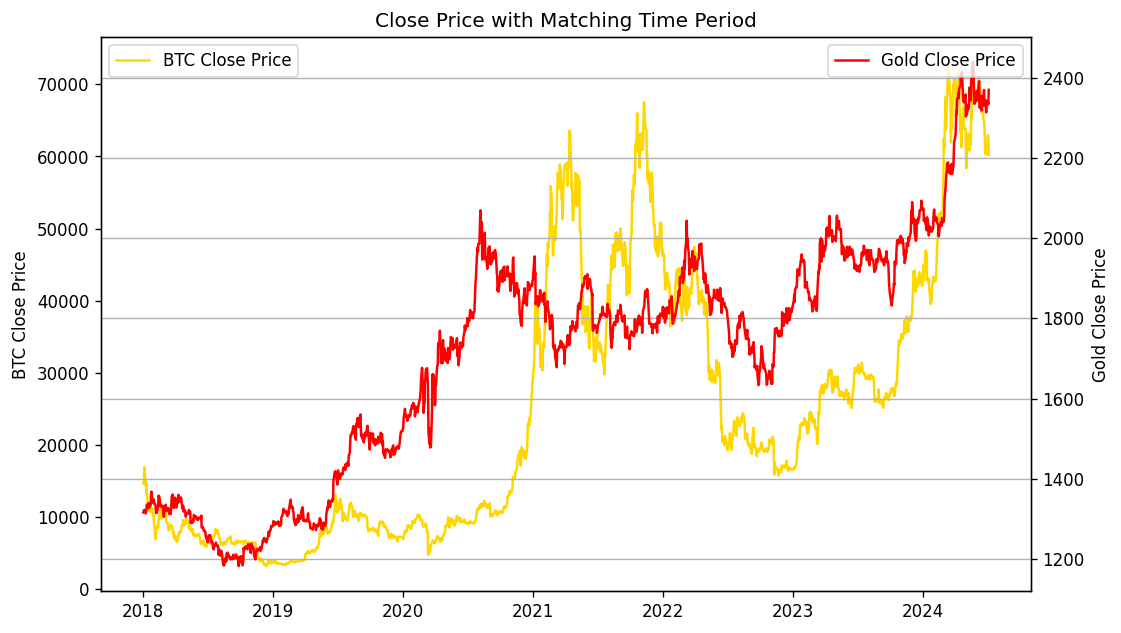

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.plot(merged_df['Open time'], merged_df['Close'], label='BTC Close Price', color='gold')

ax2 = axs.twinx()
ax2.plot(merged_df['Date'], merged_df['Close/Last'], label='Gold Close Price', color='red')

axs.set_title('Close Price with Matching Time Period')
axs.set_ylabel('BTC Close Price')
ax2.set_ylabel('Gold Close Price')

# Hiển thị chú thích cho các đường đồ thị
axs.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

NameError: name 'mdates' is not defined

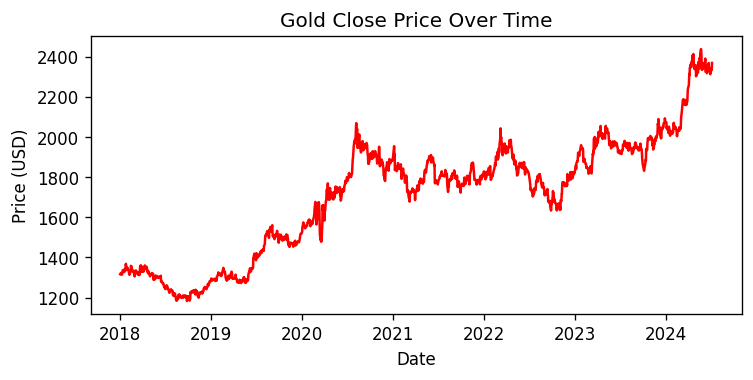

In [ ]:
# Ensure that the 'Date' column is the index if it's not already
df3_sorted.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(7, 3))
plt.plot(df3_sorted.index, df3_sorted['Close/Last'], label='Close Price', color='red')

# Set title and labels
plt.title('Gold Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Format the x-axis to show years from 2014 to 2024
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the tick labels as year

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()